### read PSP data

In [1]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter
from datetime import timedelta
import seaborn as sns
import datetime
import astropy
import astropy.constants as const
from sunpy.time import parse_time
import time
import pickle
import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py

import heliopy.data.spice as spicedata
import heliopy.spice as spice
import cdflib

import pickle5

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import astrospice



from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import cats as hc
importlib.reload(hc) #reload again while debugging

from heliocats import stats as hs
importlib.reload(hs) #reload again while debugging

#where the in situ data files are located is read 
#from config.py 
import config
importlib.reload(config)
from config import data_path
from config import data_path_ML


########### make directories first time if not there

resdir='results'
if os.path.isdir(resdir) == False: os.mkdir(resdir)

datadir='data'
if os.path.isdir(datadir) == False: os.mkdir(datadir)

indexdir='icmecat/indices_icmecat' 
if os.path.isdir(indexdir) == False: os.mkdir(indexdir) 

catdir='icmecat'
if os.path.isdir(catdir) == False: os.mkdir(catdir)

icplotsdir='icmecat/plots_icmecat/' 
if os.path.isdir(icplotsdir) == False: os.mkdir(icplotsdir) 

#Convert this notebook to a script with jupyter nbconvert --to script icmecat.ipynb
os.system('jupyter nbconvert --to script icmecat.ipynb')    

import warnings
warnings.filterwarnings('ignore')
print('done')

print(astrospice.__version__)

data_path='/nas/helio/data/insitu_python/'

/nas/helio/heliofc/miniconda3/envs/helio2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[NbConvertApp] Converting notebook icmecat.ipynb to script


done
0.1.0


[NbConvertApp] Writing 60035 bytes to icmecat.py


### Download data

In [14]:
################### FIELDS
#generate datestrings for filenames
time1=[]
tstart1=datetime.datetime(2022, 11, 1)
tend1=datetime.datetime(2022, 11, 3)
while tstart1 < tend1:
    time1.append(tstart1)  
    tstart1 += timedelta(days=1) 

#version 1 until 2020 July 31
#version 2 from 2020 Oct 21
    
os.chdir('/nas/helio/data/heliosat/data/psp_fields_l2')
#download each file
for i in np.arange(0,len(time1)):    
    time1str=time1[i].strftime('%Y%m%d')
    time1year=time1[i].strftime('%Y')  
    os.system('wget -nc https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_1min/'+time1year+'/psp_fld_l2_mag_rtn_1min_'+time1str+'_v02.cdf')
    
os.chdir('/home/heliofc/heliocats')

--2023-04-06 21:06:53--  https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_1min/2022/psp_fld_l2_mag_rtn_1min_20221101_v02.cdf
Connecting to 193.171.196.7:3128... connected.
Proxy request sent, awaiting response... 404 Not Found
2023-04-06 21:06:54 ERROR 404: Not Found.

--2023-04-06 21:06:54--  https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_1min/2022/psp_fld_l2_mag_rtn_1min_20221102_v02.cdf
Connecting to 193.171.196.7:3128... connected.
Proxy request sent, awaiting response... 404 Not Found
2023-04-06 21:06:54 ERROR 404: Not Found.



In [15]:
############# SWEAP

time1=[]
tstart1=datetime.datetime(2022, 10, 29)
tend1=datetime.datetime(2022, 11, 4)
while tstart1 < tend1:
    time1.append(tstart1)  
    tstart1 += timedelta(days=1) 

os.chdir('/nas/helio/data/heliosat/data/psp_spc_l3')

for i in np.arange(0,len(time1)):    
    time1str=time1[i].strftime('%Y%m%d')
    time1year=time1[i].strftime('%Y')    
    os.system('wget -nc https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/'+time1year+'/psp_swp_spc_l3i_'+time1str+'_v02.cdf')
      

os.chdir('/home/heliofc/heliocats')

File 'psp_swp_spc_l3i_20221029_v02.cdf' already there; not retrieving.

File 'psp_swp_spc_l3i_20221030_v02.cdf' already there; not retrieving.

--2023-04-06 21:06:55--  https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2022/psp_swp_spc_l3i_20221031_v02.cdf
Connecting to 193.171.196.7:3128... connected.
Proxy request sent, awaiting response... 404 Not Found
2023-04-06 21:06:55 ERROR 404: Not Found.

--2023-04-06 21:06:55--  https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2022/psp_swp_spc_l3i_20221101_v02.cdf
Connecting to 193.171.196.7:3128... connected.
Proxy request sent, awaiting response... 404 Not Found
2023-04-06 21:06:56 ERROR 404: Not Found.

--2023-04-06 21:06:56--  https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2022/psp_swp_spc_l3i_20221102_v02.cdf
Connecting to 193.171.196.7:3128... connected.
Proxy request sent, awaiting response... 404 Not Found
2023-04-06 21:06:56 ERROR 404: Not Found.

--2023-04-06 21:06:56--  https://spdf.gsfc.nasa.gov/pub/data/

### load pickle file up to 2021 Dec 30

In [37]:
filemag=data_path+'psp_2018_2022_rtn.p'
[psp,h]=pickle.load(open(filemag, "rb" ) ) 

#made with hd.save_psp_data

print(psp.time[0])
print(psp.time[-1])

2018-10-06 00:00:00
2021-12-30 23:59:00


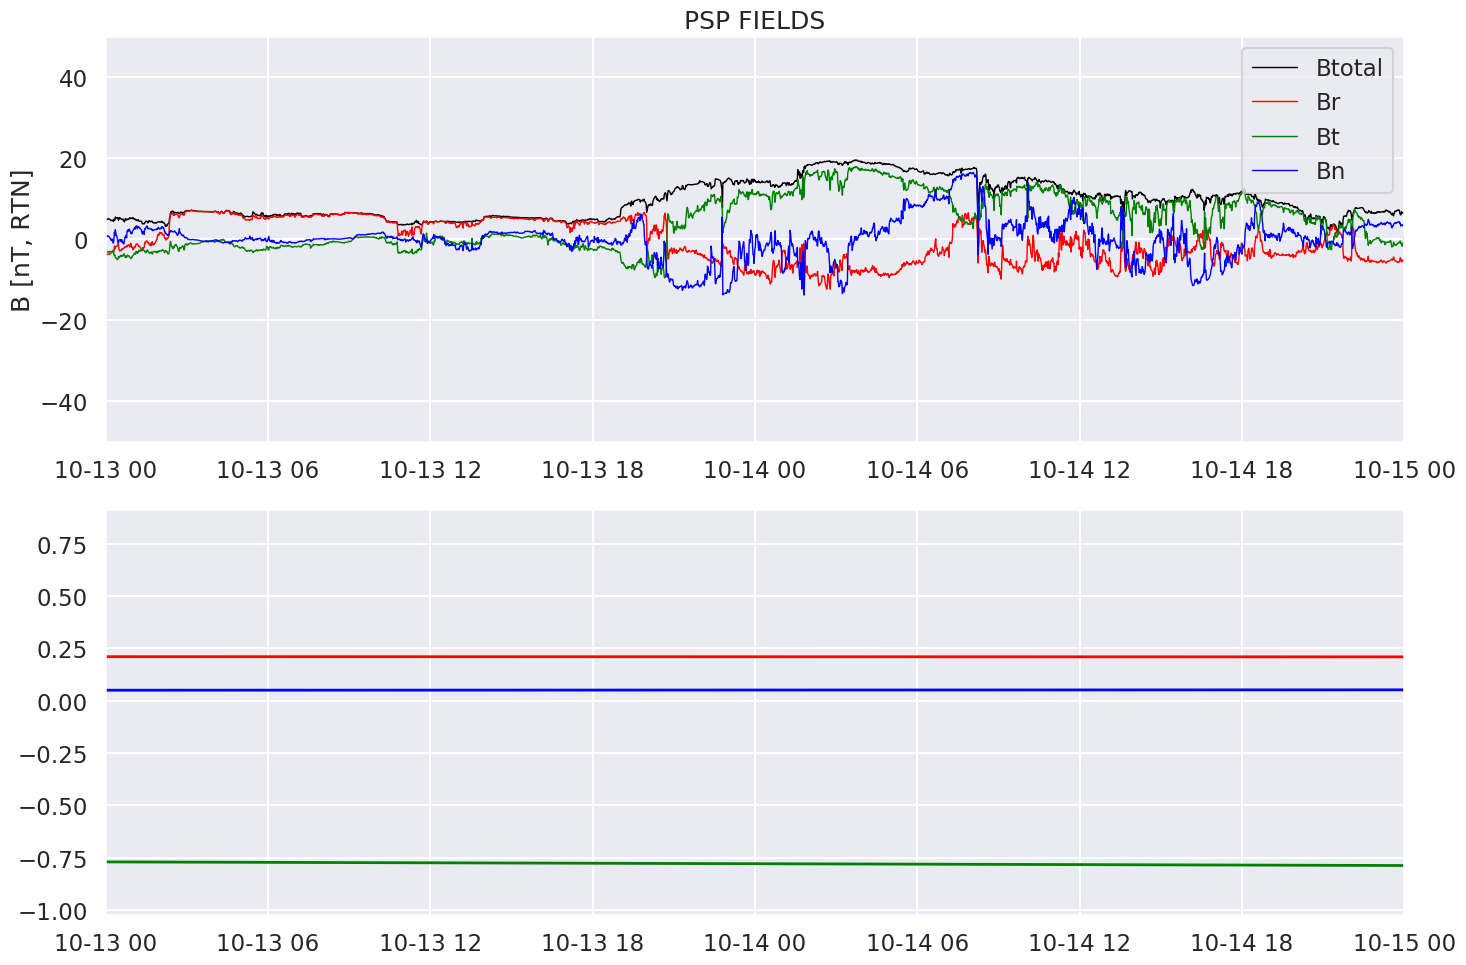

In [35]:
%matplotlib inline
sns.set_context("talk")     
sns.set_style('darkgrid')

plt.figure(1,figsize=(15, 10),dpi=100)

ax = plt.subplot(211)
plt.title('PSP FIELDS')

ax.plot(psp.time, psp.bt, "k-", lw=1, label='Btotal')
ax.plot(psp.time, psp.bx, "r-", color="red", lw=1, label='Br')
ax.plot(psp.time, psp.by, "g-", color="green", lw=1,label='Bt')
ax.plot(psp.time, psp.bz, "b-", color="blue", lw=1,label='Bn')


plt.ylabel('B [nT, RTN]')
ax.set_ylim([-50,50])
ax.legend(loc=1)


ax1 = plt.subplot(212)

ax1.plot(psp.time, psp.x, "r-", lw=2, label='y')
ax1.plot(psp.time, psp.y, "g-", lw=2, label='x')
ax1.plot(psp.time, psp.z, "b-", lw=2, label='z')

#print(np.sqrt(psp.x**2+psp.y**2+psp.z**2) )
#print(psp.r)


plotsolort=datetime.datetime(2019, 10, 13)
plotend=datetime.datetime(2019, 10,15)
ax.set_xlim(plotsolort,plotend)
ax1.set_xlim(plotsolort,plotend)

plt.tight_layout()

### read PSP data new mag only

In [9]:
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

#create time array with 1 minute resolution

t_start=datetime.datetime(2021, 12,1)
t_end=datetime.datetime(2022, 10, 31)

#t_start=datetime.datetime(2022, 9,1)
#t_end=datetime.datetime(2022, 9, 15)

#make 1 min datetimes
time_all=[]
while t_start < t_end:
    time_all.append(t_start)  
    t_start += datetime.timedelta(minutes=1)


data_path= "/nas/helio/data/heliosat/data/psp_fields_l2/"

files = os.listdir(data_path)
files.sort()
data_files = [os.path.join(data_path, f) for f in files]
print(data_files[1011])
print(data_files[-1])

m1 = cdflib.CDF(data_files[1011])
print(m1.cdf_info())

/nas/helio/data/heliosat/data/psp_fields_l2/psp_fld_l2_mag_rtn_1min_20211207_v02.cdf
/nas/helio/data/heliosat/data/psp_fields_l2/results
{'CDF': PosixPath('/nas/helio/data/heliosat/data/psp_fields_l2/psp_fld_l2_mag_rtn_1min_20211207_v02.cdf'), 'Version': '3.8.0', 'Encoding': 1, 'Majority': 'Column_major', 'rVariables': [], 'zVariables': ['epoch_mag_RTN_1min', 'psp_fld_l2_mag_RTN_1min', 'label_RTN', 'component_index_RTN', 'epoch_quality_flags', 'psp_fld_l2_quality_flags'], 'Attributes': [{'TITLE': 'Global'}, {'Project': 'Global'}, {'Discipline': 'Global'}, {'Source_name': 'Global'}, {'Descriptor': 'Global'}, {'Data_type': 'Global'}, {'Data_version': 'Global'}, {'TEXT': 'Global'}, {'MODS': 'Global'}, {'Logical_file_id': 'Global'}, {'Logical_source': 'Global'}, {'Logical_source_description': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'Instrument_type': 'Global'}, {'Mission_group': 'Global'}, {'Parents': 'Global'}, {'mag_offset_calibration_files': 'Global'}, {'attitud

In [10]:
data_files=data_files[1011:-1]

#data_files=data_files[1247:-1]


#m1 = cdflib.CDF(data_files[0])
#print(m1.cdf_info())


br1=np.zeros(0)
bt1=np.zeros(0)
bn1=np.zeros(0)
time_m=np.zeros(0,dtype=[('time',object)])


for i in np.arange(0,len(data_files)):
    m1 = cdflib.CDF(data_files[i])
    
    b=m1.varget('psp_fld_l2_mag_RTN_1min')
    br=b[:,0]
    bt=b[:,1]
    bn=b[:,2]
    
    br1=np.append(br1,br)
    bt1=np.append(bt1,bt)
    bn1=np.append(bn1,bn)

    time_m_epoch=m1.varget('epoch_mag_RTN_1min')

    time_m_datetime=parse_time(cdflib.cdfastropy.convert_to_astropy(time_m_epoch, format=None)).datetime
    time_m=np.append(time_m,time_m_datetime)
    
print('done')

############## make file with 1 minute time resolution

psp=np.zeros(np.size(time_all),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('r', float),('lat', float),('lon', float),\
            ('x', float),('y', float),('z', float),('vx', float),\
            ('vy', float),('vz', float),('vt', float),('tp', float),('np', float) ] )   


psp = psp.view(np.recarray) 

#interpolate data onto time grid

time_all_num=mdates.date2num(time_all) #make date number

time_m_num=mdates.date2num(time_m) #make date number


print('interpolate')
psp.time=time_all
psp.bx = np.interp(time_all_num, time_m_num, br1)
psp.by = np.interp(time_all_num, time_m_num, bt1)
psp.bz = np.interp(time_all_num, time_m_num, bn1)
psp.bt =np.sqrt(psp.bx**2+psp.by**2+psp.bz**2)

#solo.np=np.interp(time1_mat, timep_mat,den)
#solo.tp=np.interp(time1_mat, timep_mat,temp) 
#solo.vx=np.interp(time1_mat, timep_mat,vr)
#solo.vy=np.interp(time1_mat, timep_mat,vt)
#solo.vz=np.interp(time1_mat, timep_mat,vn)
#solo.vt=np.sqrt(solo_ll.vx**2+solo_ll.vy**2+solo_ll.vz**2)


def cart2sphere(x,y,z):
    r = np.sqrt(x**2+ y**2 + z**2)           
    theta = np.arctan2(z,np.sqrt(x**2+ y**2))
    phi = np.arctan2(y,x)                    
    return (r, theta, phi)


spice.furnish(spicedata.get_kernel('psp_pred'))
psp2=spice.Trajectory('SPP')
psp2.generate_positions(psp.time, 'Sun','HEEQ')
psp2.change_units(astropy.units.AU)
[psp2_r, psp2_lat, psp2_lon]=cart2sphere(psp2.x,psp2.y,psp2.z)

psp.x=psp2.x
psp.y=psp2.y
psp.z=psp2.z

psp.r=psp2_r
psp.lat=np.rad2deg(psp2_lat)
psp.lon=np.rad2deg(psp2_lon)

print('done')

done
interpolate
done


In [12]:
#add position - astrospice 0.1 does not work, needs python > 3.7
#kernels = astrospice.registry.get_kernels('psp', 'predict')
#psp_kernel = kernels[0]
#coverage = psp_kernel.coverage('SOLAR PROBE PLUS')

#psp_coords = astrospice.generate_coords('SOLAR PROBE PLUS', time_all)
#psp_coords_heeq = psp_coords.transform_to(sunpy.coordinates.HeliographicStonyhurst())

#print(np.size(psp_coords_heeq))
#psp.lon=psp_coords_heeq.lon.value #degrees
#psp.lat=psp_coords_heeq.lat.value
#psp.r=psp_coords_heeq.radius.to(u.au).value

#convert to cartesian coordinates, definition for latitude needs to be right!
#[psp.x, psp.y, psp.z] =hd.sphere2cart(psp.r, np.deg2rad(-psp.lat+90), np.deg2rad(psp.lon))

In [17]:
fname='psp_2022_add_mag'
data_path='/nas/helio/data/insitu_python/'
filemag=data_path+fname+'_rtn.p'
print(filemag)
pickle.dump(psp, open(filemag, "wb"))

/nas/helio/data/insitu_python/psp_2022_add_mag_rtn.p


In [18]:
psp_sceq=hd.convert_RTN_to_SCEQ(psp,'PSP')
filemag=data_path+fname+'_sceq.p'
pickle.dump(psp_sceq, open(filemag, "wb"))

RTN to SCEQ


In [ ]:
plt.figure(figsize=(15,10),dpi=300)
ax = plt.subplot(311)
ax.plot(psp.time,psp.bx,'-r',lw=0.5)
ax.plot(psp.time,psp.by,'-g',lw=0.5)
ax.plot(psp.time,psp.bz,'-b',lw=0.5)

ax1 = plt.subplot(312)
ax1.plot(psp.time,psp.x,'-r',lw=1)
ax1.plot(psp.time,psp.y,'-g',lw=1)
ax1.plot(psp.time,psp.z,'-b',lw=1)

ax2 = plt.subplot(313)
#ax2.plot(psp.time,psp.lat,'-r',lw=0.5)
ax2.plot(psp.time,psp.lon,'-g',lw=1)
#ax2.plot(psp.time,psp.z,'-b',lw=0.5)


plotstart=datetime.datetime(2022, 9, 5,15)
plotend=datetime.datetime(2022, 9,6,18)
ax.set_xlim(plotstart,plotend)

In [ ]:
#filepsp='psp_2022_sceq_new_nov2022.p'
#hd.save_psp_data(data_path,filepsp, sceq=True)   
#print('sceq done')


#filepsp='psp_2022_rtn_new_jan2023_magplasma.p'
#hd.save_psp_data(data_path,filepsp, sceq=False)   
#print('sceq done')


#filepsp='psp_2022_sceq_new_jan2023_magplasma.p'
#hd.save_psp_data(data_path,filepsp, sceq=True)   
print('sceq done')


#print('load PSP data RTN') 
#
import warnings
warnings.filterwarnings('ignore')

filepsp='psp_2022_rtn_new_jan2023.p'
[psp,hpsp]=pickle.load(open(data_path+filepsp, "rb" ) ) 
    

In [ ]:



#print('load PSP data RTN') 
#
import warnings
warnings.filterwarnings('ignore')

filepsp='psp_2022_rtn_new_jan2023.p'
[psp,hpsp]=pickle.load(open(data_path+filepsp, "rb" ) ) 
    

#orbit 10
#start=datetime.datetime(2021,11,15)
#end=datetime.datetime(2021,11,25)

start=datetime.datetime(2022,6,2)
end=datetime.datetime(2022,6,4)



################ plot new psp data for checking
sns.set_context("talk")     
sns.set_style('darkgrid')

fig=plt.figure(3,figsize=(20,15),dpi=100)

ax1=plt.subplot(311)

#  #ax1.plot(psp.time,psp.bt,'-k',lw=0.5,label='Btotal')
# #ax1.plot(psp.time,psp.bx,'-r',lw=0.2,label='Br')
# #ax1.plot(psp.time,psp.by,'-g',lw=0.2,label='Bt')
# #ax1.plot(psp.time,psp.bz,'-b',lw=0.2,label='Bn')

ax1.plot(psp.time,psp.bt,'-k',lw=1,label='Btotal')
ax1.plot(psp.time,psp.bx,'-r',lw=1,label='Br')
ax1.plot(psp.time,psp.by,'-g',lw=1,label='Bt')
ax1.plot(psp.time,psp.bz,'-b',lw=1,label='Bn')
ax1.set_xlim(start,end)
ax1.set_ylabel('FIELDS magnetic field [nT]')
ax1.legend(loc=2)
#ax1.set_ylim(-20,20)



from astropy.constants import mu0,m_p
va=(psp.bt*1e-9)/np.sqrt(mu0.value*(psp.np*1e6)*m_p.value)*1e-3

ax2=plt.subplot(312,sharex=ax1)
ax2.plot(psp.time,psp.vt/va,'--',lw=1,label='M_A')
ax2.set_ylim(0.5,1.5)


ax3=plt.subplot(313,sharex=ax1)
ax3.plot(psp.time,psp.r,'-b')
ax3.set_ylim(0.034,0.09)

ax3.set_ylabel('Heliocentric distance [AU]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

plt.title('Parker Solar Probe orbit Nr. 12')
plt.tight_layout()

# plt.savefig('results/parker_orbit_venus.png',dpi=200)
plt.savefig('results/parker_orbit12_zoom.png')
plt.savefig('results/parker_orbit12_zoom.pdf')

